In [2]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('/content/Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
data=data.drop(columns='RiskLevel',axis=1)
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


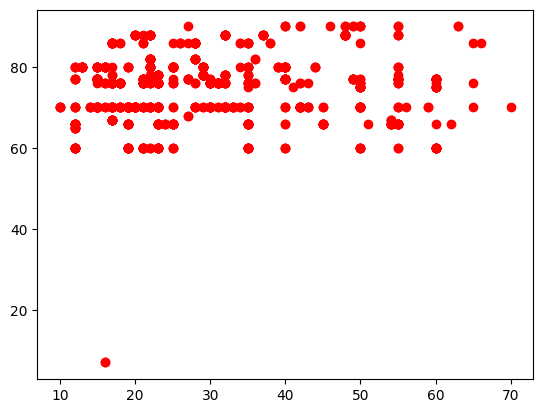

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data['Age'],data['HeartRate'],color='red')

In [9]:
from sklearn.ensemble import IsolationForest

In [11]:
clf = IsolationForest(contamination=0.1)
clf.fit(data)
predictions = clf.predict(data)

In [12]:
predictions

array([-1,  1,  1, ..., -1,  1,  1])

In [13]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   0,    7,   19,   20,   35,   70,  105,  108,  110,  111,  114,
         117,  123,  127,  130,  137,  166,  180,  182,  191,  210,  232,
         248,  262,  275,  276,  278,  288,  316,  317,  319,  326,  337,
         338,  339,  340,  341,  362,  370,  373,  382,  413,  416,  417,
         419,  422,  425,  426,  428,  431,  432,  435,  442,  458,  471,
         482,  486,  499,  502,  505,  506,  535,  538,  551,  554,  583,
         596,  599,  603,  631,  640,  644,  657,  658,  661,  670,  679,
         683,  689,  751,  787,  789,  848,  849,  908,  910,  928,  939,
         955,  961,  968,  970,  976,  982,  992,  994, 1000, 1002, 1009,
        1010, 1011]),)

In [14]:
X = data.values

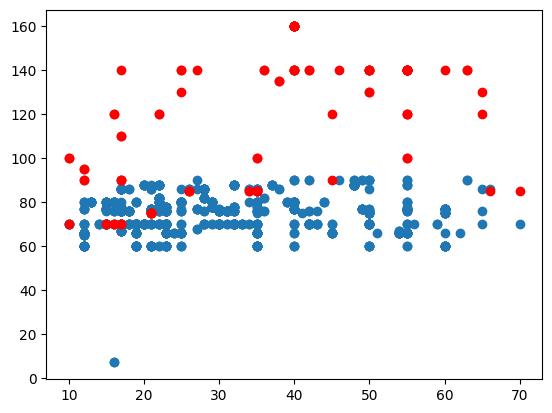

In [15]:
abn_ind = np.where(predictions<0)
plt.scatter(data['Age'],data['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

# **DBSCAN**

In [16]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [17]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)

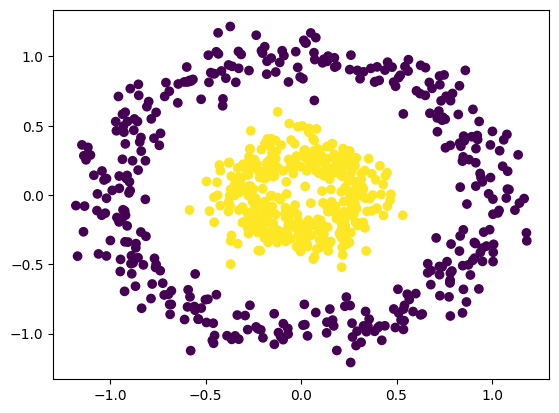

In [18]:
plt.scatter(X[:,0],X[:,1],c=y)

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)

In [20]:
dbscan.fit_predict(X)

array([ 0,  1,  0,  1,  1,  2,  1, -1,  3,  4,  1,  1,  5,  1,  6,  1,  1,
        6,  3,  7,  4,  0,  1,  1, -1,  5,  1,  1,  1,  1,  5,  4,  1,  1,
        1,  6,  1,  1,  1,  6, -1,  1,  6,  1,  1,  6,  1,  1,  1,  6, -1,
        7,  3,  1,  1,  1,  1,  0,  6,  2,  1,  4,  7, -1,  8,  1,  1,  1,
        1,  3, -1,  0,  1,  1,  0, -1,  1,  1,  1,  1,  6,  7,  5,  2,  1,
        7,  1,  5,  3,  1,  1,  2,  1,  5,  2,  3,  1,  1,  1,  1,  3, -1,
        4,  3,  7, -1,  6,  1,  1,  6, -1,  1,  1,  6,  5,  1,  6,  1,  1,
        1,  1,  0,  1,  6,  1,  0,  2,  1,  5,  1,  1,  0, -1,  1,  8,  0,
        1,  6,  1,  0,  7,  6,  7,  1,  2,  7,  1,  1,  0,  0,  5,  1,  1,
        1, -1,  0,  6,  4,  1,  1,  1,  1,  3,  2,  1,  1,  0,  6,  1,  1,
        1,  2,  1,  0,  7,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  6,  1,  2,  1,  5,  0,  6,  1,  2,  3,  6,  7,  1,  1,  4,
        1,  1, -1,  5,  1,  0,  1,  0,  1,  7,  1, -1,  0,  7,  1,  5,  3,
        6, -1,  5,  1,  1

In [21]:
dbscan.labels_

array([ 0,  1,  0,  1,  1,  2,  1, -1,  3,  4,  1,  1,  5,  1,  6,  1,  1,
        6,  3,  7,  4,  0,  1,  1, -1,  5,  1,  1,  1,  1,  5,  4,  1,  1,
        1,  6,  1,  1,  1,  6, -1,  1,  6,  1,  1,  6,  1,  1,  1,  6, -1,
        7,  3,  1,  1,  1,  1,  0,  6,  2,  1,  4,  7, -1,  8,  1,  1,  1,
        1,  3, -1,  0,  1,  1,  0, -1,  1,  1,  1,  1,  6,  7,  5,  2,  1,
        7,  1,  5,  3,  1,  1,  2,  1,  5,  2,  3,  1,  1,  1,  1,  3, -1,
        4,  3,  7, -1,  6,  1,  1,  6, -1,  1,  1,  6,  5,  1,  6,  1,  1,
        1,  1,  0,  1,  6,  1,  0,  2,  1,  5,  1,  1,  0, -1,  1,  8,  0,
        1,  6,  1,  0,  7,  6,  7,  1,  2,  7,  1,  1,  0,  0,  5,  1,  1,
        1, -1,  0,  6,  4,  1,  1,  1,  1,  3,  2,  1,  1,  0,  6,  1,  1,
        1,  2,  1,  0,  7,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  6,  1,  2,  1,  5,  0,  6,  1,  2,  3,  6,  7,  1,  1,  4,
        1,  1, -1,  5,  1,  0,  1,  0,  1,  7,  1, -1,  0,  7,  1,  5,  3,
        6, -1,  5,  1,  1

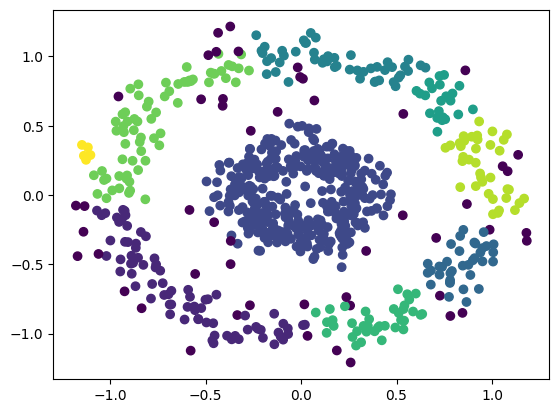

In [22]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

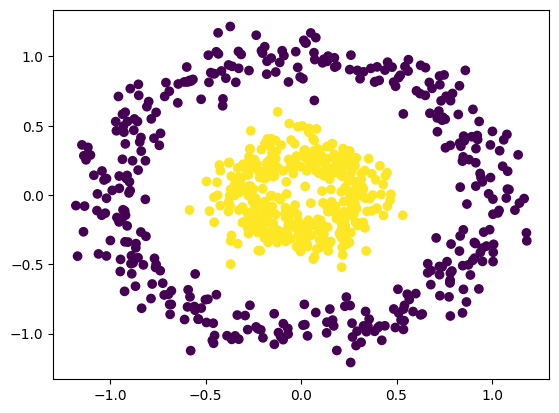

In [23]:
plt.scatter(X[:,0],X[:,1],c=y)

# **Local outlier factor**

There are two types of outliers:

Local outliers

*   List item
*   List item


Global outliers
image.png

Local outlier factor with the help of K-Nearest Neighbors calculates the local density of a given point. If the local density is low, the point is a local outlier.

# **Local outlier factors**

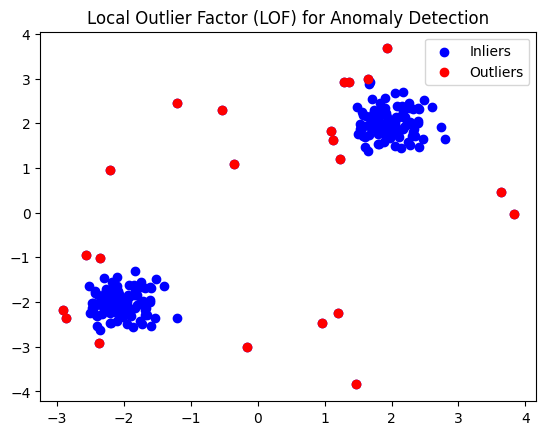

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()